# Exploratory analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [12]:
# load google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Table 1 PatientCorePopulatedTable

In [13]:
# load data
patients = pd.read_csv('/content/drive/MyDrive/Molecular/PatientCorePopulatedTable.txt', delimiter='\t', ) 
# skiprows=[0], header=None, names=names
patients.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,3A3C2AFB-FFFA-4E69-B4E6-73C1245D5D12,Male,1975-01-04 14:49:59.587,White,Single,Unknown,15.60
1,801AFB51-036F-40E3-BDFE-FED4844BE275,Male,1964-09-06 13:15:43.043,White,Unknown,English,13.23
2,366B0CC6-18AC-45DD-9AD4-BE884FE3A299,Female,1953-01-14 06:00:19.330,White,Married,English,12.11
3,DBB78149-D86C-435E-82C4-341999FD0719,Female,1986-04-28 12:42:02.007,Unknown,Unknown,Unknown,95.80
4,2C6269F4-71F8-4C07-A905-C08E9A3524C2,Female,1963-08-26 10:57:55.183,White,Unknown,English,18.08


In [14]:
print("Shape", patients.shape)
print("Size", patients.size)

Shape (10000, 7)
Size 70000


In [15]:
# mssing values
patients.isnull().sum()

PatientID                                  0
PatientGender                              0
PatientDateOfBirth                         0
PatientRace                                0
PatientMaritalStatus                       0
PatientLanguage                            0
PatientPopulationPercentageBelowPoverty    0
dtype: int64

In [16]:
print("Unique patients", len(patients['PatientID'].unique()))

Unique patients 10000


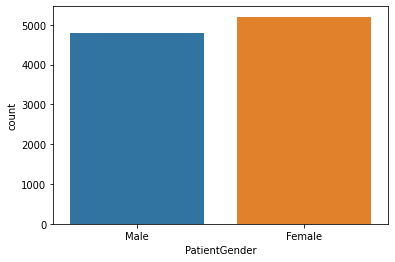

In [17]:
#male_female = patients.groupby('PatientGender').size()
sns.countplot(x='PatientGender',data=patients)

In [18]:
patients.groupby('PatientRace').size()

PatientRace
African American    1500
Asian               2300
Unknown             1300
White               4900
dtype: int64

In [19]:
patients.groupby('PatientMaritalStatus').size()

PatientMaritalStatus
Divorced     1100
Married      4500
Separated     500
Single       3200
Unknown       600
Widowed       100
dtype: int64

In [20]:
# function to find the age
def findAge(dob):
  date_time_obj = datetime.datetime.strptime(dob, '%Y-%m-%d %H:%M:%S.%f')
  birth_date = date_time_obj.date()
  end_date = datetime.date(2021, 1, 1)
  time_difference = end_date - birth_date
  age = time_difference.days
  #print("days",age)
  #print(int(age/365.2425))
  return int(age/365.2425)

In [21]:
ages=[]
for value in range(len(patients['PatientDateOfBirth'])):
    datecol = patients['PatientDateOfBirth'][value]
    dd=findAge(datecol)
    ages.append(dd)    
#patients['PatientAge'] = ages
patients.insert(3, "AgeNew", ages, True) # add age column after DOB
patients.head()

,PatientID,PatientGender,PatientDateOfBirth,AgeNew,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,3A3C2AFB-FFFA-4E69-B4E6-73C1245D5D12,Male,1975-01-04 14:49:59.587,45,White,Single,Unknown,15.60
1,801AFB51-036F-40E3-BDFE-FED4844BE275,Male,1964-09-06 13:15:43.043,56,White,Unknown,English,13.23
2,366B0CC6-18AC-45DD-9AD4-BE884FE3A299,Female,1953-01-14 06:00:19.330,67,White,Married,English,12.11
3,DBB78149-D86C-435E-82C4-341999FD0719,Female,1986-04-28 12:42:02.007,34,Unknown,Unknown,Unknown,95.80
4,2C6269F4-71F8-4C07-A905-C08E9A3524C2,Female,1963-08-26 10:57:55.183,57,White,Unknown,English,18.08


In [22]:
# the details of the patient Age
patients['AgeNew'].describe()

count    10000.000000
mean        62.834700
std         17.232332
min         31.000000
25%         50.750000
50%         61.000000
75%         75.000000
max        101.000000
Name: AgeNew, dtype: float64

In [23]:
# Gender-Age histogram/distribution
#patients.groupby('PatientGender').AgeNew.hist()

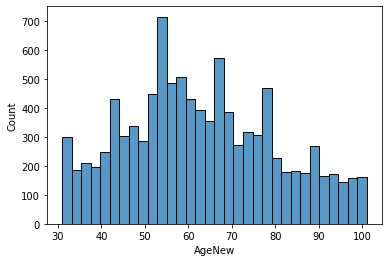

In [24]:
# patients age distribution
sns.histplot(patients['AgeNew']) # histplot

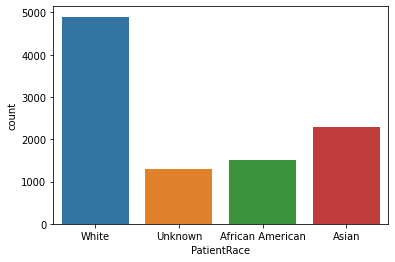

In [25]:
# patients as per Race, White
sns.countplot(x='PatientRace',data=patients)

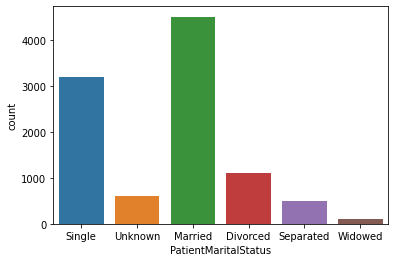

In [26]:
# Patints distribution according to the marital status
sns.countplot(x='PatientMaritalStatus',data=patients)

## Table 2 (AdmissionsCorePopulatedTable)

In [27]:
# load data
admission = pd.read_csv('/content/drive/MyDrive/Molecular/AdmissionsCorePopulatedTable.txt', delimiter='\t', ) 
# skiprows=[0], header=None, names=names
admission.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,1,1974-07-26 15:05:30.333,1974-07-30 22:27:44.987
1,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,2,1983-11-12 03:34:39.083,1983-11-30 19:05:54.040
2,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,3,1998-09-28 12:08:17.843,1998-10-08 12:56:31.233
3,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,4,1999-04-03 01:49:32.610,1999-04-09 14:04:29.210
4,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,5,2001-11-26 03:07:07.303,2001-12-01 08:22:03.783


In [28]:
# Unique admission ID's
admission['AdmissionID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [29]:
# Admission ID wise details
admission.groupby('AdmissionID').count()

,PatientID,AdmissionStartDate,AdmissionEndDate
AdmissionID,,,
1,10000,10000,10000
2,9500,9500,9500
3,7506,7506,7506
4,4817,4817,4817
5,2543,2543,2543
6,1096,1096,1096
7,435,435,435
8,173,173,173
9,52,52,52


In [30]:
# The number of days a patient was admitted for

df = pd.DataFrame(columns=["one", "two"])
df.one=pd.to_datetime(admission['AdmissionStartDate'])
df.two=pd.to_datetime(admission['AdmissionEndDate'])
difference = (df.two - df.one)
df['diff'] = difference.dt.days
df['diff'].describe()

count    36143.000000
mean        10.483828
std          5.192488
min          2.000000
25%          6.000000
50%         10.000000
75%         15.000000
max         19.000000
Name: diff, dtype: float64

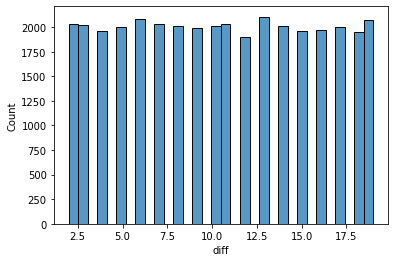

In [31]:
# plot the #days patient histogram
sns.histplot(df['diff'])

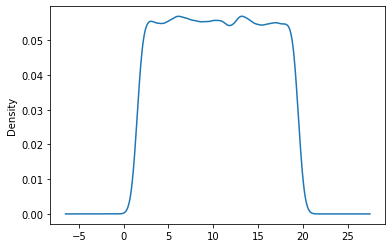

In [32]:
# Draw normal curve
ax = df['diff'].plot.kde()

## Table 3 (LabsCorePopulatedTable)

In [33]:
# load data
labs = pd.read_csv('/content/drive/MyDrive/Molecular/LabsCorePopulatedTable.txt', delimiter='\t', ) 
# skiprows=[0], header=None, names=names
labs.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: HEMATOCRIT,40.7,%,1946-09-07 22:20:26.677
1,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: ANION GAP,8.4,mmol/L,1946-09-07 11:52:58.600
2,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: LYMPHOCYTES,4.7,k/cumm,1946-09-07 06:08:57.303
3,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: HEMOGLOBIN,15.9,gm/dl,1946-09-07 19:16:10.057
4,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: SODIUM,146.6,mmol/L,1946-09-07 14:03:11.003


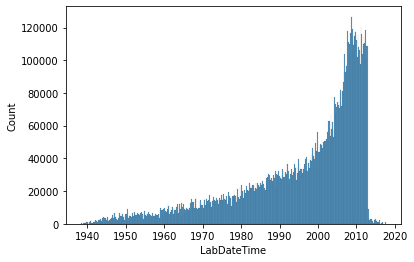

In [34]:
# Year wise lab prescribed
df3 = pd.to_datetime(labs['LabDateTime'])
sns.histplot(df3)

In [35]:
labs['LabName'].unique()

array(['CBC: HEMATOCRIT', 'METABOLIC: ANION GAP', 'CBC: LYMPHOCYTES',
       'CBC: HEMOGLOBIN', 'METABOLIC: SODIUM', 'METABOLIC: ALBUMIN',
       'METABOLIC: BUN', 'CBC: NEUTROPHILS', 'METABOLIC: CALCIUM',
       'METABOLIC: GLUCOSE', 'URINALYSIS: PH', 'METABOLIC: BILI TOTAL',
       'METABOLIC: POTASSIUM', 'URINALYSIS: RED BLOOD CELLS',
       'METABOLIC: CARBON DIOXIDE', 'METABOLIC: CREATININE',
       'URINALYSIS: SPECIFIC GRAVITY', 'CBC: MEAN CORPUSCULAR VOLUME',
       'METABOLIC: CHLORIDE', 'METABOLIC: ALT/SGPT',
       'METABOLIC: AST/SGOT', 'METABOLIC: ALK PHOS', 'CBC: EOSINOPHILS',
       'CBC: ABSOLUTE NEUTROPHILS', 'CBC: MCH',
       'URINALYSIS: WHITE BLOOD CELLS', 'CBC: ABSOLUTE LYMPHOCYTES',
       'CBC: PLATELET COUNT', 'CBC: RED BLOOD CELL COUNT',
       'CBC: WHITE BLOOD CELL COUNT', 'CBC: RDW', 'CBC: MCHC',
       'CBC: MONOCYTES', 'METABOLIC: TOTAL PROTEIN', 'CBC: BASOPHILS'],
      dtype=object)

In [36]:
labs['LabName'].value_counts()

CBC: PLATELET COUNT              306959
CBC: LYMPHOCYTES                 306957
METABOLIC: CARBON DIOXIDE        306886
CBC: EOSINOPHILS                 306886
CBC: ABSOLUTE LYMPHOCYTES        306883
URINALYSIS: PH                   306850
METABOLIC: AST/SGOT              306780
METABOLIC: CHLORIDE              306747
CBC: MONOCYTES                   306745
URINALYSIS: SPECIFIC GRAVITY     306655
METABOLIC: POTASSIUM             306629
CBC: MCH                         306592
METABOLIC: BUN                   306571
CBC: HEMATOCRIT                  306557
METABOLIC: GLUCOSE               306516
METABOLIC: SODIUM                306457
METABOLIC: ALK PHOS              306454
METABOLIC: CREATININE            306453
CBC: RDW                         306452
URINALYSIS: RED BLOOD CELLS      306431
METABOLIC: ALT/SGPT              306431
URINALYSIS: WHITE BLOOD CELLS    306391
METABOLIC: ANION GAP             306375
CBC: NEUTROPHILS                 306354
METABOLIC: ALBUMIN               306289


In [37]:
# Correlation
correlation = labs['AdmissionID'].corr(labs['AdmissionID'])
correlation

0.9999999999999999

In [38]:
labs.corr()

,AdmissionID,LabValue
AdmissionID,1.000000,0.000092
LabValue,0.000092,1.000000


## Table 4 (AdmissionsDiagnosesCorePopulatedTable)

In [39]:
# load data
admissionDiagnoses = pd.read_csv('/content/drive/MyDrive/Molecular/AdmissionsDiagnosesCorePopulatedTable.txt', delimiter='\t', ) 
admissionDiagnoses.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,1,E09.42,Drug or chemical induced diabetes mellitus wit...
1,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,2,O29.123,Cardiac failure due to anesthesia during pregn...
2,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,3,M84.561,"Pathological fracture in neoplastic disease, r..."
3,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,1,G52.3,Disorders of hypoglossal nerve
4,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,2,C40.31,Malignant neoplasm of short bones of right low...


In [40]:
# Unique diagnosis codes
codes=admissionDiagnoses['PrimaryDiagnosisCode'].unique().size
print('Unique Diagnosis codes', codes)

Unique Diagnosis codes 2625


In [41]:
# Get unique record count
admissionDiagnoses.nunique(axis=0)

PatientID                      10000
AdmissionID                       12
PrimaryDiagnosisCode            2625
PrimaryDiagnosisDescription     2618
dtype: int64

In [42]:
# Get Diabetes patient details

# E08, E09, E10, E11, the codes from E08-E09 are for diabetes
code = admissionDiagnoses[admissionDiagnoses.PrimaryDiagnosisCode.str.startswith('E08')] 
code.head(10)

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
58,37896A65-C3D7-418B-9259-256F60BB7A6D,2,E08.44,Diabetes mellitus due to underlying condition ...
177,42F93CFB-5F41-408C-91C1-6EAFB75EE53E,1,E08.62,Diabetes mellitus due to underlying condition ...
217,33BF84B0-A385-4AB8-9B93-36594C4279B7,6,E08.620,Diabetes mellitus due to underlying condition ...
245,2957D573-8F3E-4395-80CF-B323E014494D,1,E08.341,Diabetes mellitus due to underlying condition ...
326,F7DC93CB-1E8E-477F-A313-186145733B29,1,E08.9,Diabetes mellitus due to underlying condition ...
334,5A571E86-B48E-4B30-BFCE-B04AF61E1511,3,E08.349,Diabetes mellitus due to underlying condition ...
651,5B8774C3-EC72-4430-85A7-2D2D14BC25FF,3,E08.4,Diabetes mellitus due to underlying condition ...
673,54E5BC98-4DFC-432C-84BE-90A5B21D0E17,2,E08.22,Diabetes mellitus due to underlying condition ...
701,1BEE1BDF-D0D6-45B1-92F3-76FE6A0E447E,2,E08.21,Diabetes mellitus due to underlying condition ...
861,A3341F36-474F-4CA9-B9BB-A9F722F25028,2,E08.65,Diabetes mellitus due to underlying condition ...


In [43]:
# Get patients with diabetes diagnosis
diabetescode = ['E08', 'E09', 'E10', 'E11']
diabetes = admissionDiagnoses[admissionDiagnoses.PrimaryDiagnosisDescription.str.startswith('Diabetes')]
#len(pulmonarydisdf)
diabetes.head(10)
len(diabetes)

598

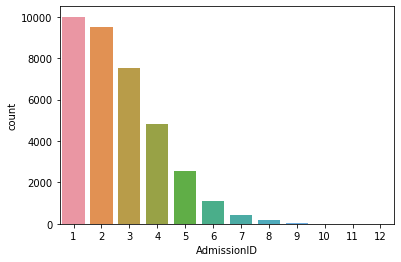

In [44]:
# Diagnosis count as per AdmissionID
sns.countplot(x='AdmissionID',data=admissionDiagnoses)